In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('phishing.csv', index_col='Index')
df

,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,Favicon,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
Index,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11050,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11051,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1


In [3]:
df.columns

Index(['UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [4]:
df.drop(columns=['LongURL', 'Symbol@', 'Redirecting//', 'DomainRegLen', 'InfoEmail', 'DisableRightClick', 'UsingPopupWindow', 'AgeofDomain', 'PageRank', 'StatsReport'])

,UsingIP,ShortURL,PrefixSuffix-,SubDomains,HTTPS,Favicon,NonStdPort,HTTPSDomainURL,RequestURL,AnchorURL,...,ServerFormHandler,AbnormalURL,WebsiteForwarding,StatusBarCust,IframeRedirection,DNSRecording,WebsiteTraffic,GoogleIndex,LinksPointingToPage,class
Index,,,,,,,,,,,,,,,,,,,,,
0,1,1,-1,0,1,1,1,-1,1,0,...,-1,1,0,1,1,-1,0,1,1,-1
1,1,1,-1,-1,-1,1,1,-1,1,0,...,-1,-1,0,1,1,-1,1,1,0,-1
2,1,1,-1,-1,-1,1,1,-1,-1,0,...,-1,1,0,1,1,-1,1,1,-1,-1
3,1,-1,-1,1,1,1,1,1,1,0,...,-1,1,0,-1,1,-1,0,1,1,1
4,-1,-1,-1,1,1,1,1,-1,1,0,...,-1,-1,0,1,1,1,1,1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11049,1,1,1,1,1,-1,-1,1,1,1,...,-1,1,0,-1,-1,1,-1,1,1,1
11050,-1,1,-1,1,-1,-1,-1,1,1,-1,...,0,-1,1,-1,1,1,1,1,-1,-1
11051,1,1,-1,1,-1,1,1,1,1,0,...,-1,1,0,1,1,1,1,1,0,-1


In [5]:
df.isnull().any()

UsingIP                False
LongURL                False
ShortURL               False
Symbol@                False
Redirecting//          False
PrefixSuffix-          False
SubDomains             False
HTTPS                  False
DomainRegLen           False
Favicon                False
NonStdPort             False
HTTPSDomainURL         False
RequestURL             False
AnchorURL              False
LinksInScriptTags      False
ServerFormHandler      False
InfoEmail              False
AbnormalURL            False
WebsiteForwarding      False
StatusBarCust          False
DisableRightClick      False
UsingPopupWindow       False
IframeRedirection      False
AgeofDomain            False
DNSRecording           False
WebsiteTraffic         False
PageRank               False
GoogleIndex            False
LinksPointingToPage    False
StatsReport            False
class                  False
dtype: bool

In [6]:
df['class'].value_counts()

class
 1    6157
-1    4897
Name: count, dtype: int64

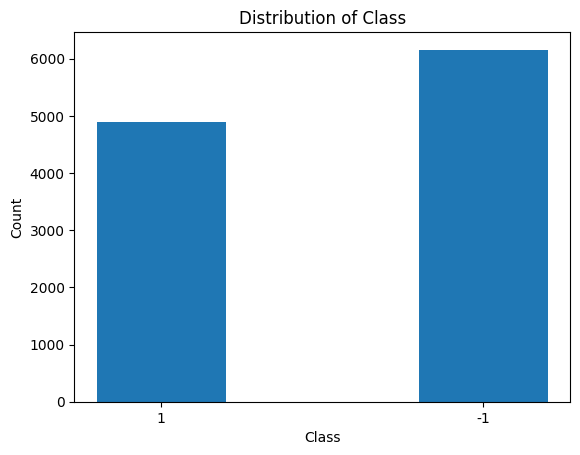

In [7]:
class_counts = df['class'].value_counts()

plt.bar(class_counts.index, class_counts.values)

plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')

plt.xticks(class_counts.index, ['-1', '1'])

plt.show()

In [8]:
is_phishing = df[df['class'] == 1]
not_phishing = df[df['class'] == -1]

is_phishing_upsampled = resample(is_phishing, n_samples=len(not_phishing))

df_balanced = pd.concat([is_phishing_upsampled, not_phishing])
df_balanced['class'].value_counts()

class
 1    4897
-1    4897
Name: count, dtype: int64

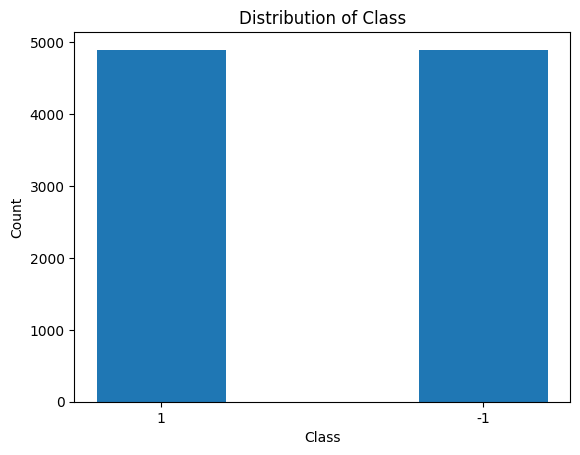

In [9]:
class_counts = df_balanced['class'].value_counts()

plt.bar(class_counts.index, class_counts.values)

plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')

plt.xticks(class_counts.index, ['-1', '1'])

plt.show()

In [10]:
x_data = df_balanced.drop(columns=['class'])
y_data = df_balanced['class']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

In [11]:
linmodel = LinearRegression()

linmodel.fit(x_train, y_train)

LinearRegression()

In [12]:
y_pred = linmodel.predict(x_test)

y_pred_class = np.where(y_pred > 0, 1, -1)

accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}\n")

report = classification_report(y_test, y_pred_class)
print("Classification Report:")
print(report)

Accuracy: 0.9290454313425217

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.91      0.93       961
           1       0.92      0.95      0.93       998

    accuracy                           0.93      1959
   macro avg       0.93      0.93      0.93      1959
weighted avg       0.93      0.93      0.93      1959



In [13]:
logmodel = LogisticRegression(solver='newton-cg')

logmodel.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [14]:
y_pred = logmodel.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}\n")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9305768249106687

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       961
           1       0.92      0.94      0.93       998

    accuracy                           0.93      1959
   macro avg       0.93      0.93      0.93      1959
weighted avg       0.93      0.93      0.93      1959



In [ ]:
param_grid = {
    'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

grid_search.fit(x_train, y_train)

params = grid_search.best_params_

print("Best Hyperparameters:", params)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=params['n_neighbors'], weights=params['weights'], metric=params['metric'])

knn.fit(x_train, y_train)

In [ ]:
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)